## Pendahuluan

Terdapat 2 dasar tipe sistem rekomendasi:
 - Sistem Rekomendasi Sederhana
 - Sistem Rekomendasi Berdasarkan Konten dari Fiturnya
 
Sistem Rekomendasi Sederhana, seperti namanya adalah sistem rekomendasi yang hanya menggunakan urutan sebagai dasar perhitungannya, yang biasanya digunakan dalam '5 film terbaik' kita akan menggunakan urutan berdasarkan mungkin vote terbanyak, rating tertinggi, penjualan film paling tinggi, atau apapun yang lain.
Dalam kasus ini, kita akan menggunakan kombinasi antara rata-rata rating, jumlah vote, dan membentuk metric baru dari metric yang sudah ada, kemudian kita akan melakukan sorting untuk metric ini dari yang tertinggi ke terendah.

Simple Recommender Engine menawarkan rekomendasi yang umum untuk semua user berdasarkan popularitas film dan terkadang genre.

Ide awal di balik sistem rekomendasi ini adalah sebagai berikut.

Film-film yang lebih populer akan memiliki kemungkinan yang lebih besar untuk disukai juga oleh rata-rata penonton.
Model ini tidak memberikan rekomendasi yang personal untuk setiap tipe user. 
Implementasi model ini pun juga bisa dibilang cukup mudah, yang perlu kita lakukan hanyalah mengurutkan film-film tersebut berdasarkan rating dan popularitas dan menunjukkan film teratas dari list film tersebut.
Sebagai tambahan, kita dapat menambahkan genre untuk mendapatkan film teratas untuk genre spesifik tersebut

Formula IMDB dengan Wieghted Rating

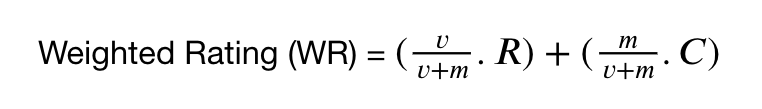

dimana,

v: jumlah votes untuk film tersebut
m: jumlah minimum votes yang dibutuhkan supaya dapat masuk dalam chart
R: rata-rata rating dari film tersebut
C: rata-rata jumlah votes dari seluruh semesta film

In [3]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

#lakukan pembacaan dataset
movie_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.basics.tsv',sep='\t') #untuk menyimpan title_basics.tsv
rating_df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/title.ratings.tsv',sep='\t') #untuk menyimpan title.ratings.tsv

In [4]:
movie_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0221078,short,"Circle Dance, Ute Indians","Circle Dance, Ute Indians",0,1898,\N,\N,"Documentary,Short"
1,tt8862466,tvEpisode,"¡El #TeamOsos va con todo al ""Reality del amor""!","¡El #TeamOsos va con todo al ""Reality del amor""!",0,2018,\N,\N,"Comedy,Drama"
2,tt7157720,tvEpisode,Episode #3.41,Episode #3.41,0,2016,\N,29,"Comedy,Game-Show"
3,tt2974998,tvEpisode,Episode dated 16 May 1987,Episode dated 16 May 1987,0,1987,\N,\N,News
4,tt2903620,tvEpisode,Frances Bavier: Aunt Bee Retires,Frances Bavier: Aunt Bee Retires,0,1973,\N,\N,Documentary


In [15]:
rating_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1608
1,tt0000002,6.0,197
2,tt0000003,6.5,1285
3,tt0000004,6.1,121
4,tt0000005,6.1,2050


In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          9025 non-null   object
 1   titleType       9025 non-null   object
 2   primaryTitle    9011 non-null   object
 3   originalTitle   9011 non-null   object
 4   isAdult         9025 non-null   int64 
 5   startYear       9025 non-null   object
 6   endYear         9025 non-null   object
 7   runtimeMinutes  9025 non-null   object
 8   genres          9014 non-null   object
dtypes: int64(1), object(8)
memory usage: 634.7+ KB


In [6]:
movie_df.isnull().sum()

tconst             0
titleType          0
primaryTitle      14
originalTitle     14
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres            11
dtype: int64

In [7]:
print(movie_df.loc[(movie_df['primaryTitle'].isnull()) | (movie_df['originalTitle'].isnull())])

          tconst  titleType primaryTitle originalTitle  isAdult startYear  \
9000  tt10790040  tvEpisode          NaN           NaN        0      2019   
9001  tt10891902  tvEpisode          NaN           NaN        0      2020   
9002  tt11737860  tvEpisode          NaN           NaN        0      2020   
9003  tt11737862  tvEpisode          NaN           NaN        0      2020   
9004  tt11737866  tvEpisode          NaN           NaN        0      2020   
9005  tt11737872  tvEpisode          NaN           NaN        0      2020   
9006  tt11737874  tvEpisode          NaN           NaN        0      2020   
9007   tt1971246  tvEpisode          NaN           NaN        0      2011   
9008   tt2067043  tvEpisode          NaN           NaN        0      1965   
9009   tt4404732  tvEpisode          NaN           NaN        0      2015   
9010   tt5773048  tvEpisode          NaN           NaN        0      2015   
9011   tt8473688  tvEpisode          NaN           NaN        0      1987   

In [9]:
#mengupdate movie_df dengan membuang data-data bernilai NULL
movie_df = movie_df.loc[(movie_df['primaryTitle'].notnull()) & (movie_df['originalTitle'].notnull())]

#menampilkan jumlah data setelah data dengan nilai NULL dibuang
print(len(movie_df))

9011


In [10]:
print(movie_df.loc[movie_df['genres'].isnull()])

          tconst  titleType  \
9014  tt10233364  tvEpisode   
9015  tt10925142  tvEpisode   
9016  tt10970874  tvEpisode   
9017  tt11670006  tvEpisode   
9018  tt11868642  tvEpisode   
9019   tt2347742  tvEpisode   
9020   tt3984412  tvEpisode   
9021   tt8740950  tvEpisode   
9022   tt9822816  tvEpisode   
9023   tt9900062  tvEpisode   
9024   tt9909210  tvEpisode   

                                           primaryTitle originalTitle  \
9014  Rolling in the Deep Dish\tRolling in the Deep ...             0   
9015  The IMDb Show on Location: Star Wars Galaxy's ...             0   
9016  Die Bauhaus-Stadt Tel Aviv - Vorbild für die M...             0   
9017  ...ein angenehmer Unbequemer...\t...ein angene...             0   
9018  GGN Heavyweight Championship Lungs With Mike T...             0   
9019  No sufras por la alergia esta primavera\tNo su...             0   
9020  I'm Not Going to Come Last, I'm Just Going to ...             0   
9021  Weight Loss Resolution Restart - Ins 

In [11]:
#mengupdate movie_df dengan membuang data-data bernilai NULL
movie_df = movie_df.loc[movie_df['genres'].notnull()]

#menampilkan jumlah data setelah data dengan nilai NULL dibuang
print(len(movie_df))

9000


In [12]:
#mengubah nilai '\\N' pada startYear menjadi np.nan dan cast kolomnya menjadi float64
movie_df['startYear'] = movie_df['startYear'].replace('\\N', np.nan)
movie_df['startYear'] = movie_df['startYear'].astype('float64')
print(movie_df['startYear'].unique()[:5])

#mengubah nilai '\\N' pada endYear menjadi np.nan dan cast kolomnya menjadi float64
movie_df['endYear'] = movie_df['endYear'].replace('\\N', np.nan)
movie_df['endYear'] = movie_df['endYear'].astype('float64')
print(movie_df['endYear'].unique()[:5])

#mengubah nilai '\\N' pada runtimeMinutes menjadi np.nan dan cast kolomnya menjadi float64
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].replace('\\N', np.nan)
movie_df['runtimeMinutes'] = movie_df['runtimeMinutes'].astype('float64')
print(movie_df['runtimeMinutes'].unique()[:5])

[1898. 2018. 2016. 1987. 1973.]
[  nan 2005. 1955. 2006. 1999.]
[nan 29.  7. 23. 85.]


In [13]:
def transform_to_list(x):
    if ',' in x: 
    #ubah menjadi list apabila ada data pada kolom genre
        return x.split(',')
    else: 
    #jika tidak ada data, ubah menjadi list kosong
        return []

movie_df['genres'] = movie_df['genres'].apply(lambda x: transform_to_list(x))

In [17]:
import pandas as pd
#Lakukan join pada kedua table
movie_rating_df = pd.merge(movie_df, rating_df, on='tconst', how='inner')

#Tampilkan 5 data teratas
print(movie_rating_df.head())

#Tampilkan tipe data dari tiap kolom
print(movie_rating_df.info())

      tconst  titleType              primaryTitle             originalTitle  \
0  tt0043745      short                 Lion Down                 Lion Down   
1  tt0167491      video         Wicked Covergirls         Wicked Covergirls   
2  tt6574096  tvEpisode      Shadow Play - Part 2      Shadow Play - Part 2   
3  tt6941700  tvEpisode              RuPaul Roast              RuPaul Roast   
4  tt7305674      video  UCLA Track & Field Promo  UCLA Track & Field Promo   

   isAdult  startYear  endYear  runtimeMinutes  \
0        0     1951.0      NaN             7.0   
1        1     1998.0      NaN            85.0   
2        0     2017.0      NaN            22.0   
3        0     2017.0      NaN             NaN   
4        0     2017.0      NaN             NaN   

                           genres  averageRating  numVotes  
0     [Animation, Comedy, Family]            7.1       459  
1                              []            5.7         7  
2  [Adventure, Animation, Comedy]        

In [23]:
movie_rating_df = movie_rating_df.dropna(subset=['startYear', 'runtimeMinutes'])

#Untuk memastikan bahwa sudah tidak ada lagi nilai NULL
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 1374
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          1004 non-null   object 
 1   titleType       1004 non-null   object 
 2   primaryTitle    1004 non-null   object 
 3   originalTitle   1004 non-null   object 
 4   isAdult         1004 non-null   int64  
 5   startYear       1004 non-null   float64
 6   endYear         17 non-null     float64
 7   runtimeMinutes  1004 non-null   float64
 8   genres          1004 non-null   object 
 9   averageRating   1004 non-null   float64
 10  numVotes        1004 non-null   int64  
 11  score           1004 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 102.0+ KB


In [19]:
C = movie_rating_df['averageRating'].mean()
print(C)

6.829581673306767


In [20]:
m = movie_rating_df['numVotes'].quantile(0.8)
print(m)

229.0


In [22]:
def imdb_weighted_rating(df, var=0.8):
    v = df['numVotes']
    R = df['averageRating']
    C = df['averageRating'].mean()
    m = df['numVotes'].quantile(var)
    df['score'] = (v/(v+m))*R + (m/(m+v))*C #Rumus IMDb 
    return df['score']
    
imdb_weighted_rating(movie_rating_df)

#melakukan pengecekan dataframe
movie_rating_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
0,tt0043745,short,Lion Down,Lion Down,0,1951.0,NaN,7.0,"[Animation, Comedy, Family]",7.1,459,7.009992
1,tt0167491,video,Wicked Covergirls,Wicked Covergirls,1,1998.0,NaN,85.0,[],5.7,7,6.796077
2,tt6574096,tvEpisode,Shadow Play - Part 2,Shadow Play - Part 2,0,2017.0,NaN,22.0,"[Adventure, Animation, Comedy]",8.5,240,7.684380
5,tt2262289,movie,The Pin,The Pin,0,2013.0,NaN,85.0,[],7.7,27,6.921384
6,tt0874027,tvEpisode,Episode #32.9,Episode #32.9,0,2006.0,NaN,29.0,"[Comedy, Game-Show, News]",8.0,8,6.869089


In [25]:
imdb_weighted_rating(movie_rating_df)

def simple_recommender(df, top=100):
    df = df.loc[df['numVotes'] >= m]
    df = df.sort_values(by='score', ascending=False) #urutkan dari nilai tertinggi ke terendah
    
    #Ambil data 100 teratas
    df = df[:top]
    return df
    
#Ambil data 25 teratas     
simple_recommender(movie_rating_df, top=25)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
68,tt4110822,tvEpisode,S.O.S. Part 2,S.O.S. Part 2,0,2015.0,NaN,43.0,"[Action, Adventure, Drama]",9.4,3820,9.254624
236,tt2200252,video,Attack of the Clones Review,Attack of the Clones Review,0,2010.0,NaN,86.0,[],9.3,1411,8.955045
1181,tt7697962,tvEpisode,Chapter Seventeen: The Missionaries,Chapter Seventeen: The Missionaries,0,2019.0,NaN,54.0,"[Drama, Fantasy, Horror]",9.2,1536,8.892450
326,tt7124590,tvEpisode,Chapter Thirty-Four: Judgment Night,Chapter Thirty-Four: Judgment Night,0,2018.0,NaN,42.0,"[Crime, Drama, Mystery]",9.1,1859,8.850993
1045,tt0533506,tvEpisode,The Prom,The Prom,0,1999.0,NaN,60.0,"[Action, Drama, Fantasy]",8.9,2740,8.740308
71,tt8399426,tvEpisode,Savages,Savages,0,2018.0,NaN,58.0,"[Drama, Fantasy, Romance]",9.0,1428,8.700045
1234,tt2843830,tvEpisode,VIII.,VIII.,0,2014.0,NaN,57.0,"[Adventure, Drama]",8.9,1753,8.660784
1087,tt4295140,tvSeries,Chef's Table,Chef's Table,0,2015.0,NaN,50.0,[],8.6,12056,8.566998
1054,tt2503932,tvEpisode,Trial and Error,Trial and Error,0,2013.0,NaN,43.0,"[Drama, Fantasy, Horror]",8.6,2495,8.451165
448,tt0337566,video,AC/DC: Live at Donington,AC/DC: Live at Donington,0,1992.0,NaN,120.0,"[Documentary, Music]",8.5,1343,8.256663


In [27]:
def user_prefer_recommender(df, ask_adult, ask_start_year, ask_genre, top=100):
    if ask_adult.lower() == 'yes':
        df = df.loc[df['isAdult'] == 1]
    elif ask_adult.lower() == 'no':
        df = df.loc[df['isAdult'] == 0]

    df = df.loc[df['startYear'] >= int(ask_start_year)]

    if ask_genre.lower() == 'all':
        df = df
    else:
        def filter_genre(x):
            if ask_genre.lower() in str(x).lower():
                return True
            else:
                return False
        df = df.loc[df['genres'].apply(lambda x: filter_genre(x))]

    df = df.loc[df['numVotes'] >= m]
    df = df.sort_values(by='score', ascending=False)
    
    df = df[:top]
    return df

user_prefer_recommender(movie_rating_df,
                       ask_adult = 'no',
                        ask_start_year = 2000,
                       ask_genre = 'drama'
                       )

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,score
68,tt4110822,tvEpisode,S.O.S. Part 2,S.O.S. Part 2,0,2015.0,NaN,43.0,"[Action, Adventure, Drama]",9.4,3820,9.254624
1181,tt7697962,tvEpisode,Chapter Seventeen: The Missionaries,Chapter Seventeen: The Missionaries,0,2019.0,NaN,54.0,"[Drama, Fantasy, Horror]",9.2,1536,8.892450
326,tt7124590,tvEpisode,Chapter Thirty-Four: Judgment Night,Chapter Thirty-Four: Judgment Night,0,2018.0,NaN,42.0,"[Crime, Drama, Mystery]",9.1,1859,8.850993
71,tt8399426,tvEpisode,Savages,Savages,0,2018.0,NaN,58.0,"[Drama, Fantasy, Romance]",9.0,1428,8.700045
1234,tt2843830,tvEpisode,VIII.,VIII.,0,2014.0,NaN,57.0,"[Adventure, Drama]",8.9,1753,8.660784
1054,tt2503932,tvEpisode,Trial and Error,Trial and Error,0,2013.0,NaN,43.0,"[Drama, Fantasy, Horror]",8.6,2495,8.451165
1281,tt3166390,tvEpisode,Looking for a Plus-One,Looking for a Plus-One,0,2014.0,NaN,28.0,"[Comedy, Drama, Romance]",8.7,396,8.014679
151,tt3954426,tvEpisode,Bleeding Kansas,Bleeding Kansas,0,2014.0,NaN,42.0,"[Drama, Western]",8.6,437,7.991253
1344,tt6644294,tvEpisode,The Hostile Hospital: Part Two,The Hostile Hospital: Part Two,0,2018.0,NaN,40.0,"[Adventure, Comedy, Drama]",8.3,812,7.976536
357,tt4084774,tvEpisode,Trial and Punishment,Trial and Punishment,0,2015.0,NaN,56.0,"[Adventure, Drama]",8.8,289,7.928908
